# Exploring Dandiset 001359: Patch-seq data from human brain tissue

**Disclaimer:** This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results.

## Overview of the Dandiset

This notebook explores Dandiset [001359 (version 0.250401.1603)](https://dandiarchive.org/dandiset/001359/0.250401.1603).

According to its metadata, Dandiset 001359 is titled "20250331_AIBS_Patchseq_human" and is described as "HMBA Lein PatchSeq upload (human) (Q1 2025)". The data includes measurements like CurrentClampStimulusSeries, ProcessingModule, CurrentClampSeries, VoltageClampSeries, and VoltageClampStimulusSeries, obtained using techniques such as voltage clamp, current clamp, and analytical techniques.

This notebook will cover:
- How to list assets in the Dandiset using the DANDI API.
- How to load a specific NWB (Neurodata Without Borders) file from the Dandiset.
- Basic exploration of the NWB file structure and metadata.
- How to load and visualize examples of Current Clamp and Voltage Clamp series data from the NWB file.

## Required Packages

This notebook requires the following Python packages. It is assumed they are already installed:
- `dandi` (for interacting with the DANDI Archive)
- `pynwb` (for working with NWB files)
- `h5py` (dependency for NWB/remfile)
- `remfile` (for streaming remote HDF5 files)
- `matplotlib` (for plotting)
- `numpy` (for numerical operations)
- `seaborn` (for plot styling)

## Loading the Dandiset using DANDI API

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset_id = "001359"
dandiset_version = "0.250401.1603"
dandiset = client.get_dandiset(dandiset_id, dandiset_version)

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}") # Using the dandiarchive URL directly for clarity
print(f"Dandiset DANDI URL: https://dandiarchive.org/dandiset/{dandiset_id}/{dandiset_version}")


# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: 20250331_AIBS_Patchseq_human
Dandiset URL: https://dandiarchive.org/dandiset/001359/0.250401.1603
Dandiset DANDI URL: https://dandiarchive.org/dandiset/001359/0.250401.1603

First 5 assets:
- sub-1203384279/sub-1203384279_ses-1207984257_icephys.nwb (ID: 67dc935f-cbc1-4255-bfbf-b8a3b21dacf9)
- sub-1203384279/sub-1203384279_ses-1207304122_icephys.nwb (ID: 6ea1c410-f443-44ef-a471-41fdf7bc8760)
- sub-1203384279/sub-1203384279_ses-1207262032_icephys.nwb (ID: c269347a-2d4b-4b6a-8b7c-2ef303ff503d)
- sub-1203384279/sub-1203384279_ses-1207418023_icephys.nwb (ID: f9663375-c4d6-4a9a-941f-c93c8a7b333a)
- sub-1203384279/sub-1203384279_ses-1208065964_icephys.nwb (ID: e11626f5-2176-48fc-9c4e-26da02787ba3)


## Loading an NWB File

We will select one NWB file from the Dandiset to explore its contents.

The file we will load is: `sub-1203384279/sub-1203384279_ses-1207262032_icephys.nwb`.
This file was chosen as the first NWB file listed in the assets.

Its asset ID is `c269347a-2d4b-4b6a-8b7c-2ef303ff503d`.
The direct download URL for this asset can be constructed as:
`https://api.dandiarchive.org/api/assets/c269347a-2d4b-4b6a-8b7c-2ef303ff503d/download/`

In [2]:
import pynwb
import h5py
import remfile
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_theme() # Apply seaborn styling for plots

# Define the URL for the chosen NWB asset
nwb_asset_id = "c269347a-2d4b-4b6a-8b7c-2ef303ff503d"
nwb_url = f"https://api.dandiarchive.org/api/assets/{nwb_asset_id}/download/"
print(f"Loading NWB file from: {nwb_url}")

# Load the NWB file using remfile for remote streaming
# It's good practice to open in read-only mode ('r') when just exploring
remote_f = remfile.File(nwb_url)
h5_f = h5py.File(remote_f, 'r')
io = pynwb.NWBHDF5IO(file=h5_f, mode='r', load_namespaces=True)
nwbfile = io.read()

print("\nNWB file loaded successfully.")
print(f"Identifier: {nwbfile.identifier}")
print(f"Session Description: {nwbfile.session_description}")
print(f"Session Start Time: {nwbfile.session_start_time}")
print(f"Subject ID: {nwbfile.subject.subject_id if nwbfile.subject else 'N/A'}")

Loading NWB file from: https://api.dandiarchive.org/api/assets/c269347a-2d4b-4b6a-8b7c-2ef303ff503d/download/


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.2.4 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."



NWB file loaded successfully.
Identifier: 0b7926a648abdf35aa91c67131cbd47b1d9786dd72001bd7e2b454be71ac3a6c
Session Description: PLACEHOLDER
Session Start Time: 2022-09-06 17:44:39.146000+00:00
Subject ID: 1203384279


### Explore this NWB file on Neurosift

You can explore the full contents of this NWB file interactively on Neurosift using the following link:

[Neurosift: sub-1203384279_ses-1207262032_icephys.nwb](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/c269347a-2d4b-4b6a-8b7c-2ef303ff503d/download/&dandisetId=001359&dandisetVersion=draft)

(Note: The link uses `dandisetVersion=draft` which usually resolves to the latest version, matching our specified version `0.250401.1603` at the time of notebook creation.)

### Summary of NWB File Contents

The NWB file contains various types of data, primarily electrophysiology recordings. Key groups include:

- **`nwbfile.acquisition`**: This likely holds the raw recorded data traces. We expect to find `CurrentClampSeries` (voltage recordings under current clamp) and `VoltageClampSeries` (current recordings under voltage clamp) here. Each series represents data recorded during a specific experimental sweep or protocol.
  - Example: `nwbfile.acquisition['data_00000_AD0']` is a `VoltageClampSeries`.
  - Example: `nwbfile.acquisition['data_00004_AD0']` is a `CurrentClampSeries`.

- **`nwbfile.stimulus`**: This group typically stores the stimulus waveforms applied during the recordings. These are often linked to the `acquisition` series.
  - Example: `nwbfile.stimulus['data_00000_DA0']` is a `VoltageClampStimulusSeries`, likely the stimulus for `nwbfile.acquisition['data_00000_AD0']`.

- **`nwbfile.icephys_electrodes`**: Contains metadata about the intracellular electrodes used.

- **`nwbfile.processing`**: May contain processed data, such as detected spike times. For instance, `nwbfile.processing['spikes']` might contain `TimeSeries` objects for spike events per sweep. However, initial exploration suggested these might not always align perfectly with clear action potentials in the raw traces for this particular file.

- **`nwbfile.epochs`**: Provides timing information for different experimental epochs.

- **`nwbfile.sweep_table`**: A table that groups different PatchClampSeries objects (sweeps).

We will now visualize some example data from these series.

## Visualizing a Current Clamp Series

Let's load and plot a segment of a `CurrentClampSeries`. We'll use `data_00005_AD0` from `nwbfile.acquisition`. This series records voltage changes in response to an injected current.

Exploring CurrentClampSeries: data_00005_AD0
Data shape: (182375,)
Data unit: volts (Note: this is the recorded signal's unit)
Sampling rate: 50000.0 Hz
Starting time: 1822.66100025177 s
Stimulus description: X1PS_SubThresh_DA_0


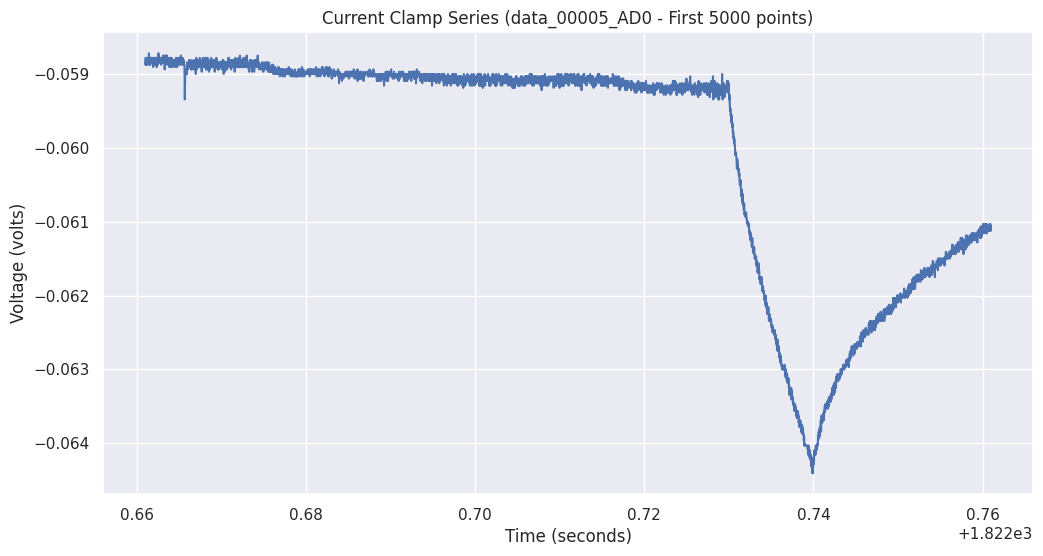

In [3]:
# Access a CurrentClampSeries
ccs_name = 'data_00005_AD0'
ccs = nwbfile.acquisition[ccs_name]

print(f"Exploring CurrentClampSeries: {ccs_name}")
print(f"Data shape: {ccs.data.shape}")
print(f"Data unit: {ccs.unit} (Note: this is the recorded signal's unit)")
print(f"Sampling rate: {ccs.rate} Hz")
print(f"Starting time: {ccs.starting_time} s")
print(f"Stimulus description: {ccs.stimulus_description}")

# Load a subset of data (e.g., first 5000 points) for plotting
num_points_to_plot_ccs = 5000
data_subset_ccs = ccs.data[:num_points_to_plot_ccs] * ccs.conversion # Apply conversion factor

# Calculate time vector for the subset
time_subset_ccs = np.arange(num_points_to_plot_ccs) / ccs.rate + ccs.starting_time

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(time_subset_ccs, data_subset_ccs)
plt.xlabel(f"Time ({ccs.starting_time_unit})")
plt.ylabel(f"Voltage ({ccs.unit})") # Corrected label: CurrentClampSeries measures voltage
plt.title(f"Current Clamp Series ({ccs_name} - First {num_points_to_plot_ccs} points)")
plt.grid(True)
plt.show()

The plot above shows a segment of the recorded voltage trace. We can observe a hyperpolarizing event, which is typical of a response to a negative current injection step in current clamp mode.

## Visualizing a Voltage Clamp Series and its Stimulus

Next, let's examine a `VoltageClampSeries`, which records the current flowing through the cell membrane while the voltage is held (clamped) at a specified level by the amplifier. We will plot the recorded current (`data_00002_AD0`) alongside its corresponding voltage stimulus (`data_00002_DA0`). We will use a slightly longer segment to capture more of the response dynamics.

Exploring VoltageClampSeries: data_00002_AD0 (response)
Response - Data shape: (12297000,), unit: amperes, rate: 200000.0 Hz, start_time: 1038.1360001564026s
Stimulus (data_00002_DA0) - Data shape: (12297000,), unit: volts, rate: 200000.0 Hz, start_time: 1038.1360001564026s


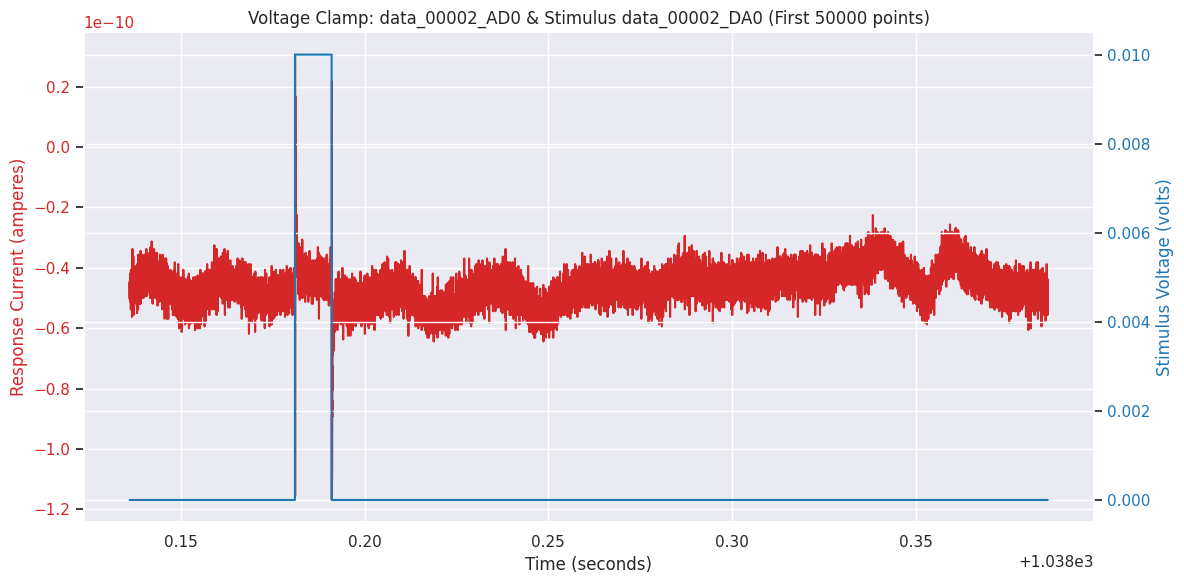

In [4]:
# Access VoltageClampSeries (response) and its stimulus
vcs_response_name = 'data_00002_AD0'
vcs_stimulus_name = 'data_00002_DA0'

vcs_response = nwbfile.acquisition[vcs_response_name]
vcs_stimulus = nwbfile.stimulus[vcs_stimulus_name]

print(f"Exploring VoltageClampSeries: {vcs_response_name} (response)")
print(f"Response - Data shape: {vcs_response.data.shape}, unit: {vcs_response.unit}, rate: {vcs_response.rate} Hz, start_time: {vcs_response.starting_time}s")
print(f"Stimulus ({vcs_stimulus_name}) - Data shape: {vcs_stimulus.data.shape}, unit: {vcs_stimulus.unit}, rate: {vcs_stimulus.rate} Hz, start_time: {vcs_stimulus.starting_time}s")

# Load a subset of data (e.g., first 50000 points)
num_points_to_plot_vcs = 50000
response_subset_vcs = vcs_response.data[:num_points_to_plot_vcs] * vcs_response.conversion
stimulus_subset_vcs = vcs_stimulus.data[:num_points_to_plot_vcs] * vcs_stimulus.conversion

# Calculate time vector (assuming rates and starting times are the same for response and stimulus)
time_subset_vcs = np.arange(num_points_to_plot_vcs) / vcs_response.rate + vcs_response.starting_time

# Plot the data
fig, ax1 = plt.subplots(figsize=(12, 6))

color_response = 'tab:red'
ax1.set_xlabel(f"Time ({vcs_response.starting_time_unit})")
ax1.set_ylabel(f"Response Current ({vcs_response.unit})", color=color_response)
ax1.plot(time_subset_vcs, response_subset_vcs, color=color_response)
ax1.tick_params(axis='y', labelcolor=color_response)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color_stimulus = 'tab:blue'
ax2.set_ylabel(f"Stimulus Voltage ({vcs_stimulus.unit})", color=color_stimulus)
ax2.plot(time_subset_vcs, stimulus_subset_vcs, color=color_stimulus)
ax2.tick_params(axis='y', labelcolor=color_stimulus)

plt.title(f"Voltage Clamp: {vcs_response_name} & Stimulus {vcs_stimulus_name} (First {num_points_to_plot_vcs} points)")
fig.tight_layout()
plt.grid(True, axis='x') # Add grid only to x-axis for clarity with dual y-axes
plt.show()

In this plot, the blue trace shows the voltage stimulus (a step pulse), and the red trace shows the corresponding current response. We can clearly see the capacitive spikes at the beginning and end of the voltage step, as well as the sustained current that flows during the pulse. These are characteristic features of voltage clamp recordings.

## Summary and Future Directions

This notebook demonstrated how to:
- Access and list contents of Dandiset 001359.
- Load a specific NWB file from this Dandiset.
- Perform basic exploration of the NWB file's structure.
- Visualize segments of `CurrentClampSeries` and `VoltageClampSeries` data, along with its stimulus.

**Possible Future Directions:**
- **Systematic sweep analysis:** Iterate through all sweeps in `nwbfile.sweep_table` and analyze features from each (e.g., input resistance from current clamp steps, peak currents from voltage clamp steps).
- **Event detection:** Although the pre-computed spikes in `nwbfile.processing['spikes']` seemed misaligned in a quick check, one could implement custom spike detection algorithms on the `CurrentClampSeries` data to identify action potentials.
- **Parameter extraction:** Extract electrophysiological parameters like resting membrane potential, action potential threshold, width, amplitude, afterhyperpolarization, etc.
- **Comparison across cells/subjects:** If multiple NWB files representing different cells or subjects are analyzed, their properties could be compared.
- **Correlation with Patch-seq data:** Since this is a Patch-seq Dandiset, a key analysis would be to correlate the electrophysiological features with transcriptomic or morphological data for the same cells, if available and linked within the Dandiset or associated metadata.

Remember to close the NWB file if you are done with it, though for this notebook, we'll leave it to be implicitly closed when the kernel stops or variables are cleared.
```python
# Close the NWB HDF5 file and the remote file object
# io.close()
# h5_f.close()
# remote_f.close()
```

In [5]:
# Clean up - close file resources
# This is good practice, especially in scripts, though Jupyter notebooks often manage this implicitly.
try:
    io.close()
    print("NWB IO closed.")
except Exception as e:
    print(f"Error closing NWB IO: {e}")

try:
    h5_f.close()
    print("HDF5 file closed.")
except Exception as e:
    print(f"Error closing HDF5 file: {e}")

try:
    remote_f.close() # remfile object
    print("Remote file object closed.")
except Exception as e:
    print(f"Error closing remote file object: {e}")

print("Exploration complete.")

NWB IO closed.
HDF5 file closed.
Remote file object closed.
Exploration complete.
